In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,  KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [67]:
ls

Bagging.ipynb              bagging/
Body_text_eda.ipynb        color-bagging.ipynb
GradBoost.ipynb            doom_txt.csv
Logistic-Regression.ipynb  grad_boost/
acnh_txt.csv               log_regres/


In [68]:
acnh_colors=pd.read_csv('../acnh_colors.csv')
doom_colors=pd.read_csv('../doom_colors.csv')

In [69]:
acnh=pd.read_csv('../archive/animal_crossing_dataset.csv')
doom=pd.read_csv('../archive/doom_crossing_dataset.csv')

In [92]:
X_acnh=pd.DataFrame(acnh['filename']).set_index(index_a)
X_doom=pd.DataFrame(doom['filename']).set_index(index_d)
y_colors=pd.concat([X_doom, X_acnh])

In [70]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [71]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)
Xd=pd.DataFrame(doom['title']).set_index(index_d)
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])
for title in X_titles.iloc[:,0]:
    title.replace('villagers', 'villager')

In [72]:
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)  # Checkout out the options!
document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])
X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X_titles.index, inplace=True)

In [84]:
X_color=doom_colors.append(acnh_colors).set_index(keys='filename')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_color, y, test_size=0.2)

In [14]:
n=[1, 5, 10, 25, 50, 75, 100, 200, 500]
depths=[1, 5, 10, 25, 50, 75, 100]
test_depths=[]
train_depths=[]
oob_score=[]
for depth in depths:
    model_R=RandomForestClassifier(75, max_depth=depth, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    test_depths.append(model_R.score(X_test, y_test))
    train_depths.append(model_R.score(X_train, y_train))
    oob_score.append(model_R.oob_score_)

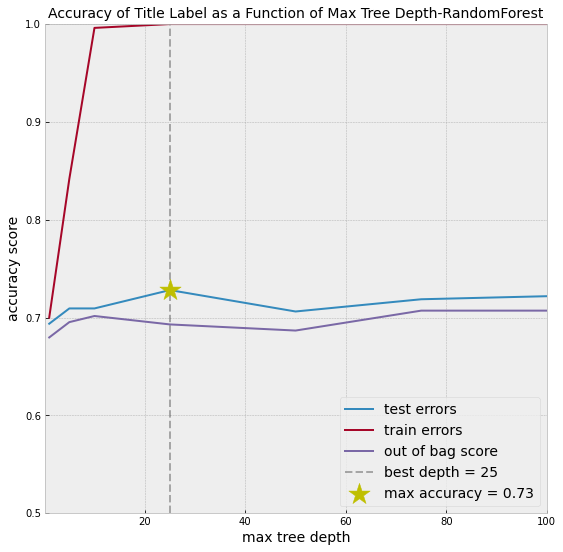

In [17]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(depths, test_depths, label = 'test errors')
ax.plot(depths, train_depths, label = 'train errors')
ax.plot(depths, oob_score, label = 'out of bag score')
ax.set_xlabel('max tree depth', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Classification as a Function of Max Tree Depth-RandomForest Colors', fontsize=14)
ax.set_xlim(0.1, 100)
ax.set_ylim(0.5, 1)
ax.scatter(depths[test_depths.index(max(test_depths))], max(test_depths), label = f'max accuracy = {max(test_depths):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(depths[test_depths.index(max(test_depths))], label = f'best depth = {depths[test_depths.index(max(test_depths))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('bagging/Color_depth_rand_for', bbox_inches='tight')

In [29]:
n=[2, 5, 10, 25, 50, 75, 100, 200, 500, 750, 1000, 2000, 3000, 4000, 5000]
depths=[1, 5, 10, 25, 50, 75, 100]
test_est=[]
train_est=[]
oob_score=[]
for est in n:
    model_R=RandomForestClassifier(est, max_depth=25, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_train, y_train)
    test_est.append(model_R.score(X_test, y_test))
    train_est.append(model_R.score(X_train, y_train))
    oob_score.append(model_R.oob_score_)

In [75]:
model_R=RandomForestClassifier(200, max_depth=25, oob_score=True)#solver lbfgs, L2 cost function
model_R.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=200, oob_score=True)

In [76]:
y_hat=model_R.predict(X_test)

In [83]:
y_colors.iloc[100:110]

,subreddit,predicted
id,,
cyj05r,Doom,AnimalCrossing
ggpzoa,AnimalCrossing,AnimalCrossing
feo9ta,Doom,AnimalCrossing
g0vcvi,Doom,Doom
fw21ay,AnimalCrossing,Doom
g178sb,AnimalCrossing,AnimalCrossing
fzsgxa,Doom,Doom
g3pyud,AnimalCrossing,Doom
guiiq2,AnimalCrossing,AnimalCrossing


In [94]:
y_colors.loc['cyj05r']

filename    4xdnyq2yb3k31.jpg
Name: cyj05r, dtype: object

In [79]:
y_colors=y_test.copy()
y_colors['predicted']=y_hat

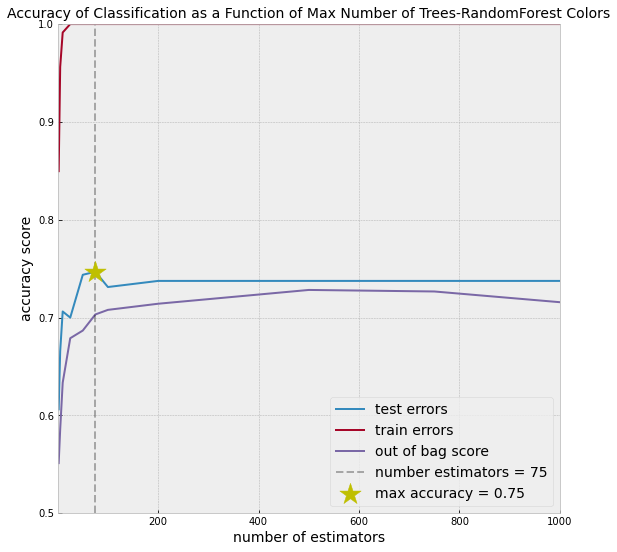

In [30]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(n, test_est, label = 'test errors')
ax.plot(n, train_est, label = 'train errors')
ax.plot(n, oob_score, label = 'out of bag score')
ax.set_xlabel('number of estimators', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Classification as a Function of Max Number of Trees-RandomForest Colors', fontsize=14)
ax.set_xlim(0.1, 1000)
ax.set_ylim(0.5, 1)
ax.scatter(n[test_est.index(max(test_est))], max(test_est), label = f'max accuracy = {max(test_est):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(n[test_est.index(max(test_est))], label = f'number estimators = {n[test_est.index(max(test_est))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('bagging/Color_depth_rand_for', bbox_inches='tight')

In [37]:
acnh_prob_color_train=pd.DataFrame(model_R.predict_proba(X_train)[:,1], index=y_train.index)
acnh_prob_color_test=pd.DataFrame(model_R.predict_proba(X_test)[:,1], index=y_test.index)

In [85]:
X_title_train=X_tf_idf.loc[y_train.index]
X_title_test=X_tf_idf.loc[y_test.index]

In [41]:
X_title_train.shape
y_train.shape

(1277, 2875)

In [43]:
n=[1, 5, 10, 25, 50, 75, 100, 200, 500]
depths=[1, 5, 10, 25, 50, 75, 100]
test_depths=[]
train_depths=[]
oob_score=[]
for depth in depths:
    model_R=RandomForestClassifier(75, max_depth=depth, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_title_train, y_train)
    test_depths.append(model_R.score(X_title_test, y_test))
    train_depths.append(model_R.score(X_title_train, y_train))
    oob_score.append(model_R.oob_score_)

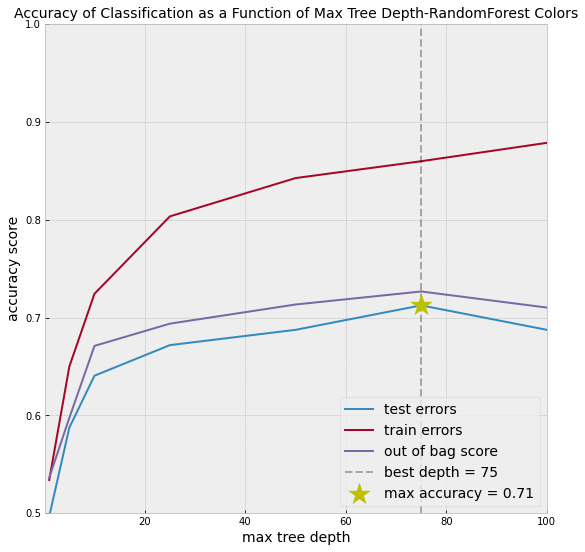

In [44]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(depths, test_depths, label = 'test errors')
ax.plot(depths, train_depths, label = 'train errors')
ax.plot(depths, oob_score, label = 'out of bag score')
ax.set_xlabel('max tree depth', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Classification as a Function of Max Tree Depth-RandomForest Colors', fontsize=14)
ax.set_xlim(0.1, 100)
ax.set_ylim(0.5, 1)
ax.scatter(depths[test_depths.index(max(test_depths))], max(test_depths), label = f'max accuracy = {max(test_depths):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(depths[test_depths.index(max(test_depths))], label = f'best depth = {depths[test_depths.index(max(test_depths))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('bagging/Color_depth_rand_for', bbox_inches='tight')

In [49]:
n=[2, 5, 10, 25, 50, 75, 100, 200, 500, 750, 1000, 2000, 3000, 4000, 5000]
depths=[1, 5, 10, 25, 50, 75, 100]
test_est=[]
train_est=[]
oob_score=[]
for est in n:
    model_R=RandomForestClassifier(est, max_depth=75, oob_score=True)#solver lbfgs, L2 cost function
    model_R.fit(X_title_train, y_train)
    test_est.append(model_R.score(X_title_test, y_test))
    train_est.append(model_R.score(X_title_train, y_train))
    oob_score.append(model_R.oob_score_)

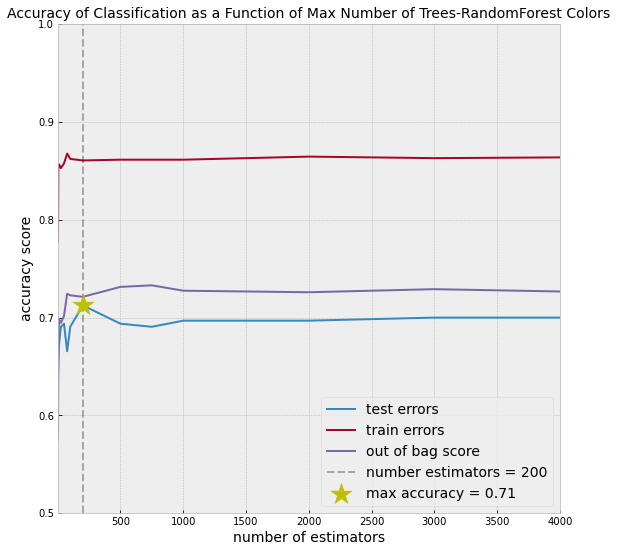

In [50]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(n, test_est, label = 'test errors')
ax.plot(n, train_est, label = 'train errors')
ax.plot(n, oob_score, label = 'out of bag score')
ax.set_xlabel('number of estimators', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Classification as a Function of Max Number of Trees-RandomForest Colors', fontsize=14)
ax.set_xlim(0.1, 4000)
ax.set_ylim(0.5, 1)
ax.scatter(n[test_est.index(max(test_est))], max(test_est), label = f'max accuracy = {max(test_est):.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(n[test_est.index(max(test_est))], label = f'number estimators = {n[test_est.index(max(test_est))]}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);

In [86]:
model_R=RandomForestClassifier(200, max_depth=75, oob_score=True)#solver lbfgs, L2 cost function
model_R.fit(X_title_train, y_train)

RandomForestClassifier(max_depth=75, n_estimators=200, oob_score=True)

In [88]:
y_hat=model_R.predict(X_title_test)
y_titles=y_test.copy()
y_titles['predicted']=y_hat

In [91]:
y_titles[90:100]

,subreddit,predicted
id,,
g7t08k,AnimalCrossing,AnimalCrossing
gn8pye,Doom,AnimalCrossing
gu30jz,Doom,AnimalCrossing
g7mis1,AnimalCrossing,AnimalCrossing
gvg5t7,AnimalCrossing,Doom
ccqci7,Doom,Doom
dq5fru,AnimalCrossing,Doom
f1cvkg,AnimalCrossing,AnimalCrossing
ft9zn4,Doom,Doom


In [98]:
X_titles.loc['gvg5t7'][0] Predict Doom: 'Black Lives Matter!'

'Black Lives Matter!'

In [52]:
acnh_prob_title_train=pd.DataFrame(model_R.predict_proba(X_title_train)[:,1], index=y_train.index)
acnh_prob_title_test=pd.DataFrame(model_R.predict_proba(X_title_test)[:,1], index=y_test.index)

In [54]:
prob_train=pd.concat([acnh_prob_title_train, acnh_prob_color_train], axis=1)
prob_test=pd.concat([acnh_prob_title_test, acnh_prob_color_test], axis=1)

In [ ]:
model_R=RandomForestClassifier(200, max_depth=25, oob_score=True)#solver lbfgs, L2 cost function
model_R.fit(X_train, y_train)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb_model=MultinomialNB()
nb_model.fit(prob_train, y_train)

MultinomialNB()

In [65]:
nb_model.score(prob_test, y_test)

0.5

In [63]:
prob_train

,0,0
id,,
g8jju6,0.142391,0.1668
g078yk,0.530759,0.1776
gdxlvs,0.229747,0.0628
fqlfah,0.627907,0.9654
fwhytk,0.606893,0.8802
...,...,...
gnzozt,0.977181,0.9004
cdh8k6,0.637153,0.9644
g794en,0.134486,0.2054
